In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [77]:
df = pd.read_csv('dataset/data.csv')
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [78]:
df.drop(columns=['date', 'street', 'country'], inplace=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4600 non-null   float64
 1   bedrooms       4600 non-null   float64
 2   bathrooms      4600 non-null   float64
 3   sqft_living    4600 non-null   int64  
 4   sqft_lot       4600 non-null   int64  
 5   floors         4600 non-null   float64
 6   waterfront     4600 non-null   int64  
 7   view           4600 non-null   int64  
 8   condition      4600 non-null   int64  
 9   sqft_above     4600 non-null   int64  
 10  sqft_basement  4600 non-null   int64  
 11  yr_built       4600 non-null   int64  
 12  yr_renovated   4600 non-null   int64  
 13  city           4600 non-null   object 
 14  statezip       4600 non-null   object 
dtypes: float64(4), int64(9), object(2)
memory usage: 539.2+ KB
None


In [79]:
print("Fitur:", df.columns[1:].tolist())  
print("Label:", df.columns[0]) 

Fitur: ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'city', 'statezip']
Label: price


In [80]:
y = df["price"]
X = df.drop(columns=["price"])

In [81]:
# Identifikasi kolom kategorikal
categorical_cols = X.select_dtypes(include='object').columns
print("Kolom kategorikal:", categorical_cols.tolist())
print("\nSebelum Encoding:\n", X[categorical_cols].head())

Kolom kategorikal: ['city', 'statezip']

Sebelum Encoding:
         city  statezip
0  Shoreline  WA 98133
1    Seattle  WA 98119
2       Kent  WA 98042
3   Bellevue  WA 98008
4    Redmond  WA 98052


In [82]:
# Label encoding
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# Update kembali ke df
df[X.columns] = X


In [83]:
print("\nSetelah Encoding:\n", X[categorical_cols].head())


Setelah Encoding:
    city  statezip
0    36        62
1    35        58
2    18        26
3     3         7
4    31        31


Jumlah data sebelum menghapus outlier: 4600
Jumlah data setelah menghapus outlier: 3316


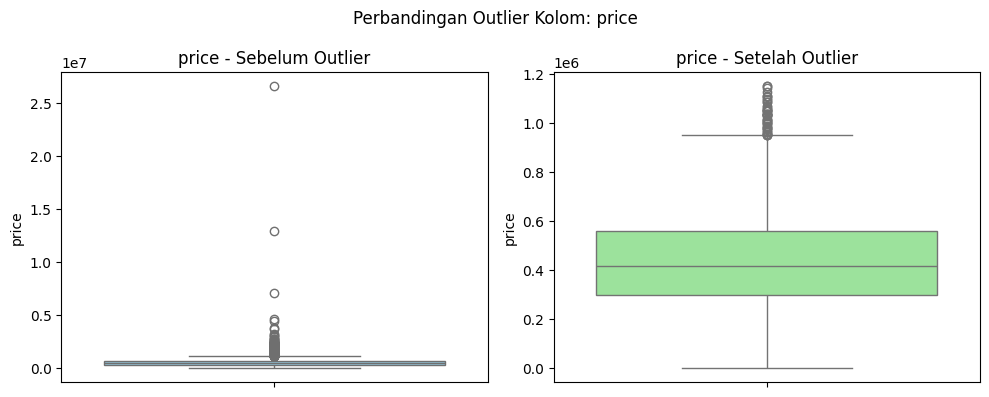

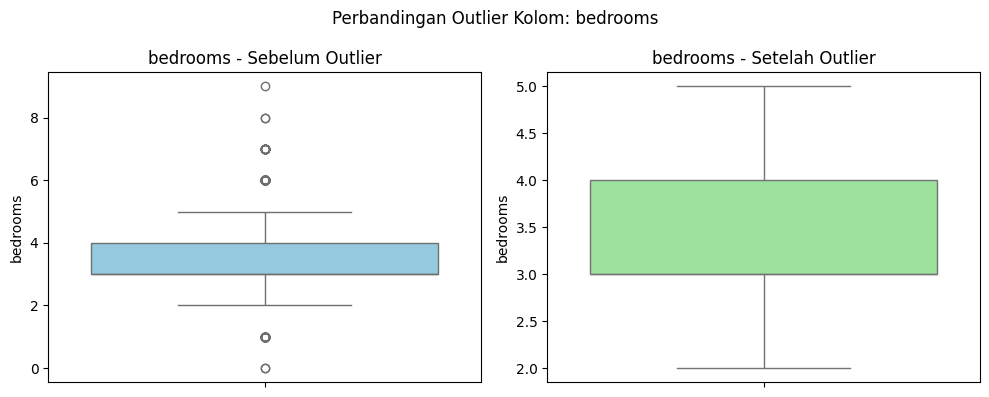

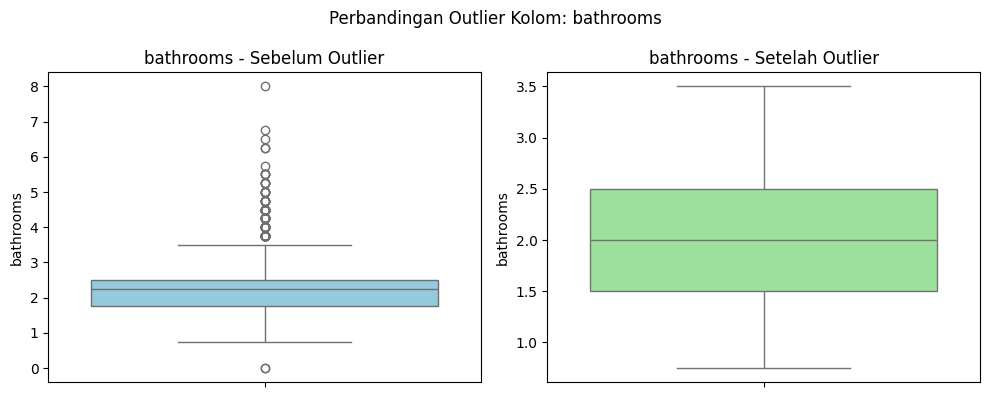

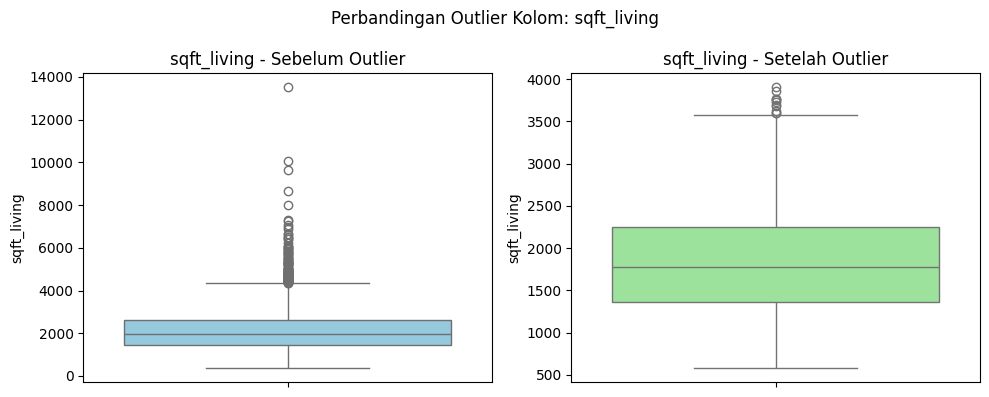

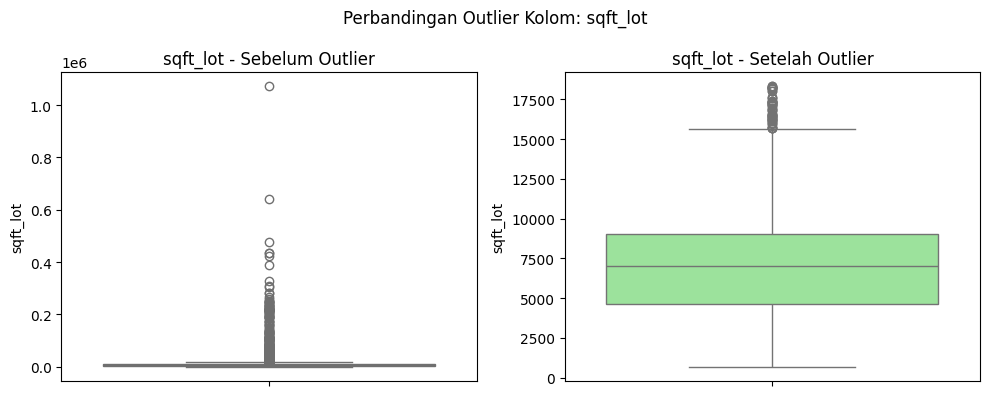

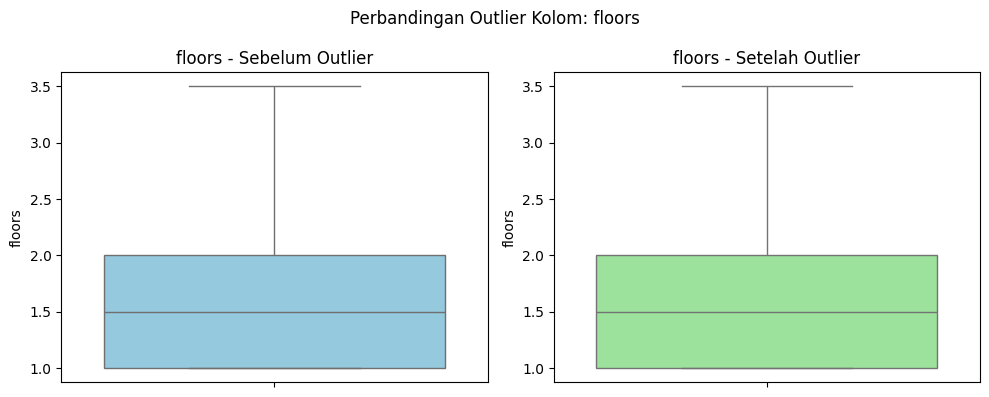

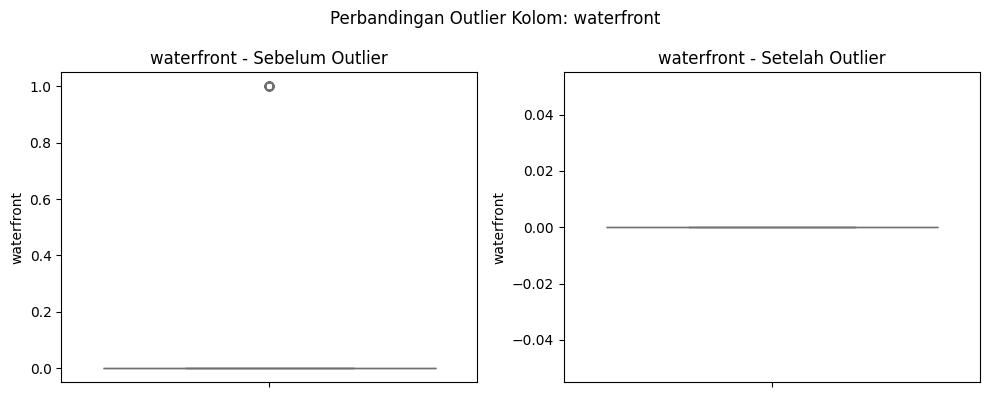

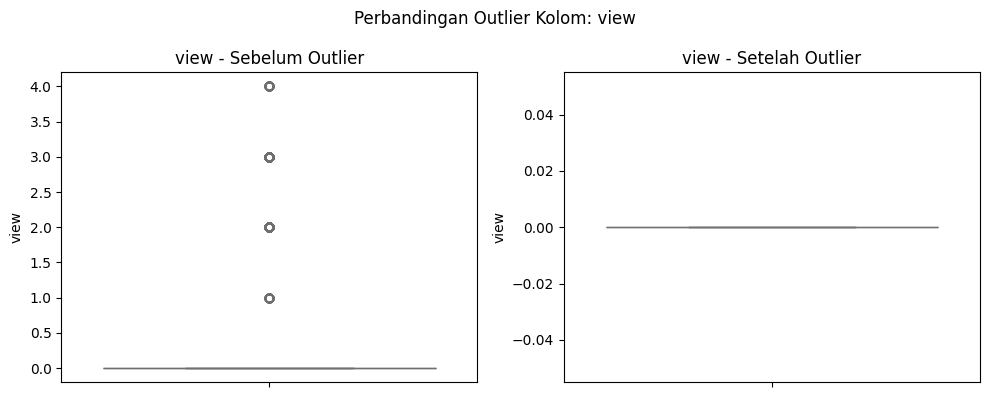

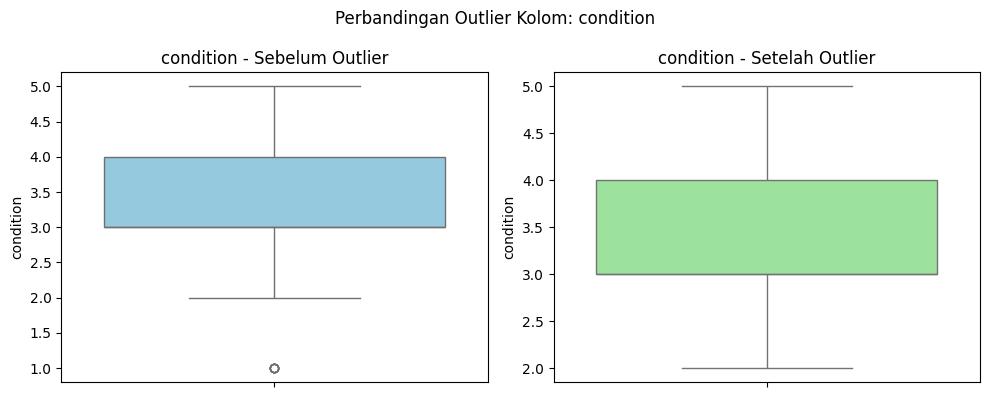

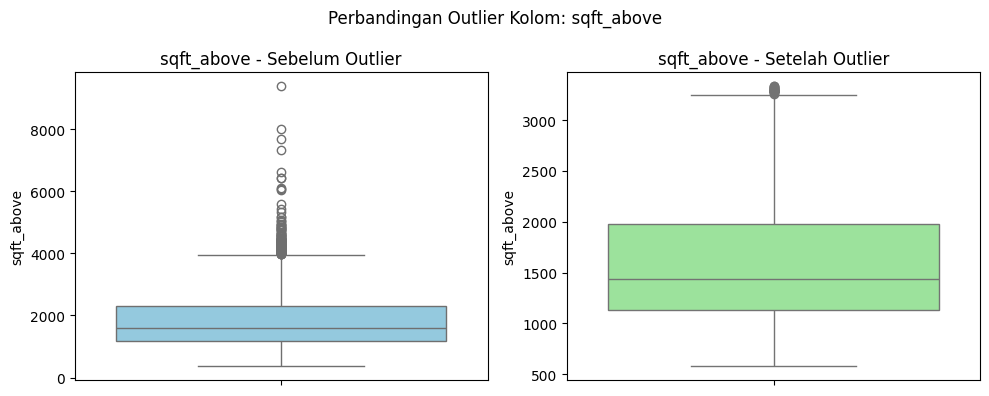

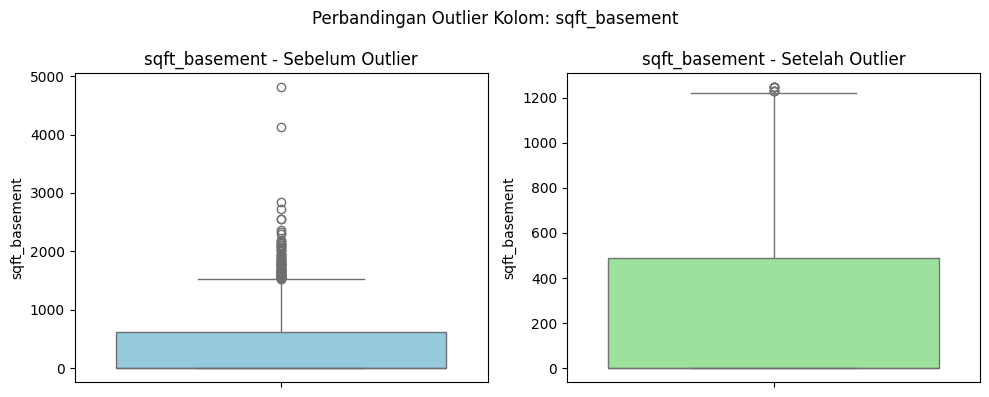

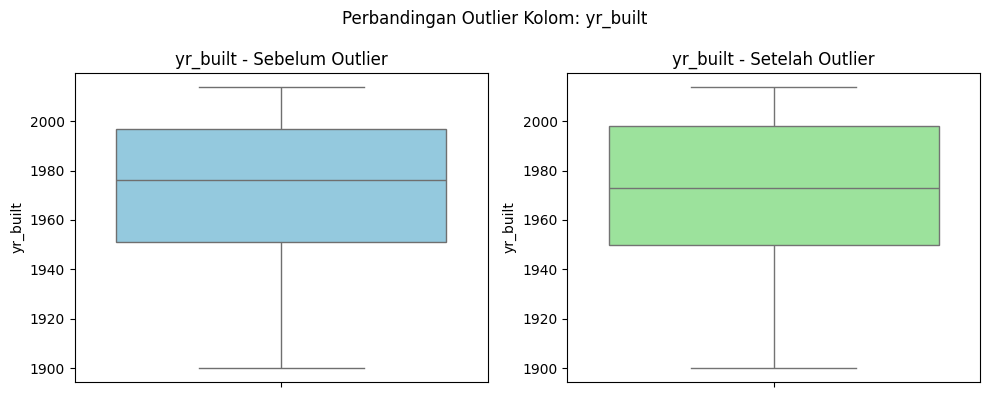

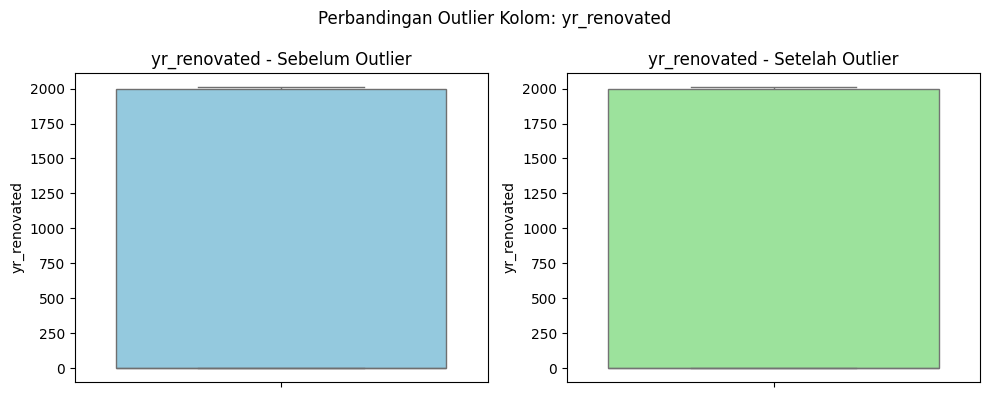

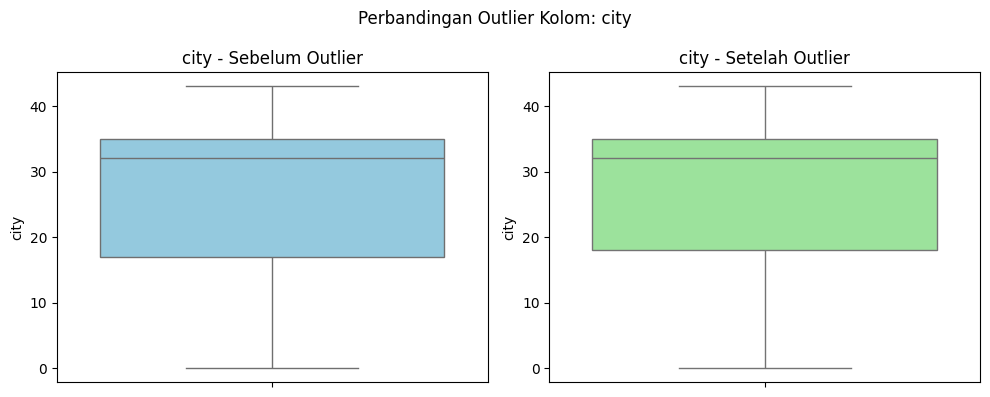

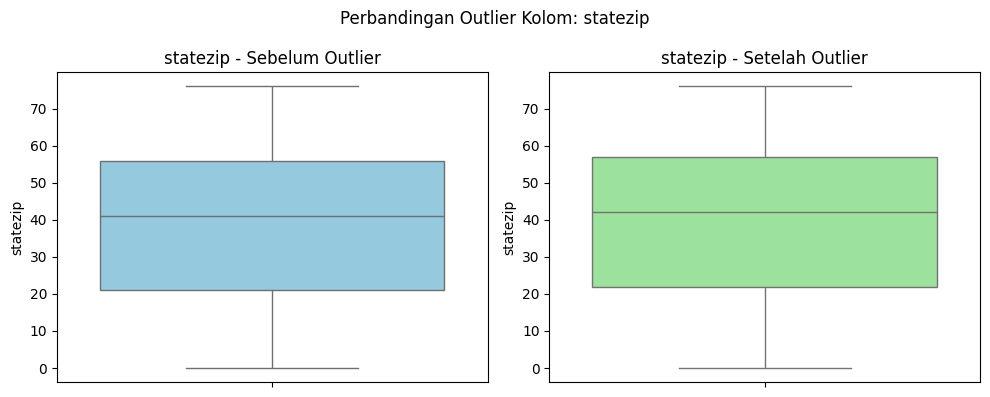

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Salin data
df_no_outliers = df.copy()
df_before = df.copy()  # Simpan salinan sebelum outlier dihapus

# Hanya kolom numerik
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

print("Jumlah data sebelum menghapus outlier:", len(df_before))

# Hapus outlier per kolom numerik
for col in numeric_cols:
    Q1 = df_no_outliers[col].quantile(0.25)
    Q3 = df_no_outliers[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_no_outliers = df_no_outliers[
        (df_no_outliers[col] >= lower_bound) & (df_no_outliers[col] <= upper_bound)
    ]

print("Jumlah data setelah menghapus outlier:", len(df_no_outliers))

# === Visualisasi per fitur ===
for col in numeric_cols:
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    
    sns.boxplot(y=df_before[col], ax=axes[0], color="skyblue")
    axes[0].set_title(f'{col} - Sebelum Outlier')
    
    sns.boxplot(y=df_no_outliers[col], ax=axes[1], color="lightgreen")
    axes[1].set_title(f'{col} - Setelah Outlier')
    
    plt.suptitle(f'Perbandingan Outlier Kolom: {col}')
    plt.tight_layout()
    plt.show()


In [85]:
df_no_outliers.to_csv("dataset/data_bersih.csv", index=False)
print("✅ Data bersih sudah disimpan ke 'data_bersih.csv'")

✅ Data bersih sudah disimpan ke 'data_bersih.csv'
